# Проектная работа по модулю “Математика и статистика в Python”

1.Загрузить файл hr.csv.

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

# 1. Загрузить файл hr.csv.

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import pylab 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('HR.csv', sep=',')
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
data.mode()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                 3.0            0.0   0.0                    0.0  sales   
1                 NaN            NaN   NaN                    NaN    NaN   

  salary  
0    low  
1    NaN

In [6]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [7]:
data.corr().style.background_gradient(cmap='bone')

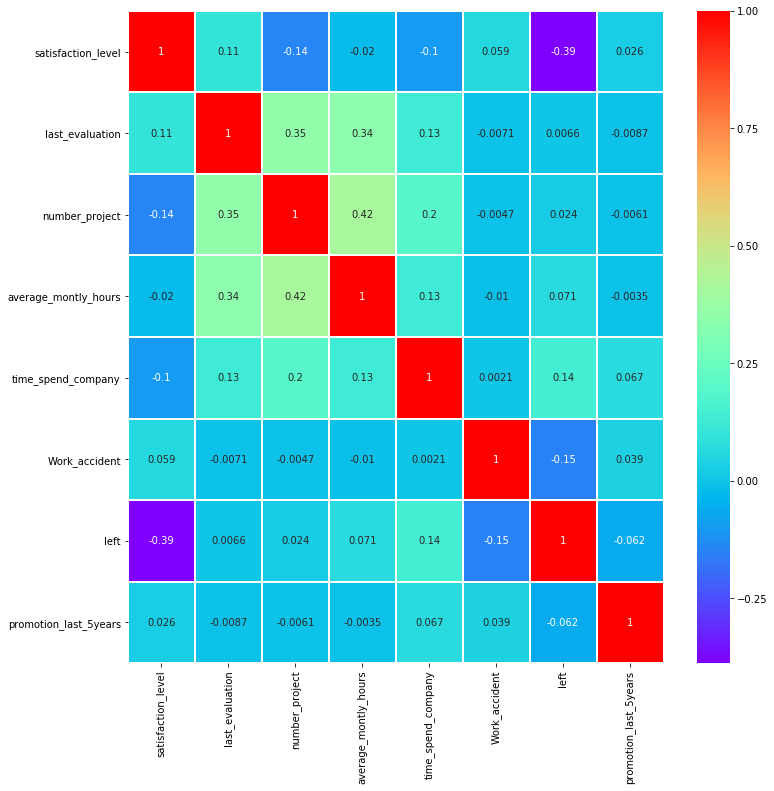

In [18]:
plt.subplots(figsize=(12, 12))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=1, 
            cmap='rainbow')

По кореляционным матрицам видно, что наибольшую кореляцию имеют такие показатели как последняя оценка и номер проекта, последняя оценка и среднемесячные рабочие часы, номер проекта и среднемесячные рабочие часы, Уровень удовлетворенности и статус "Уволился".

# 4.Визуализировать несколько взаимосвязей между переменными.

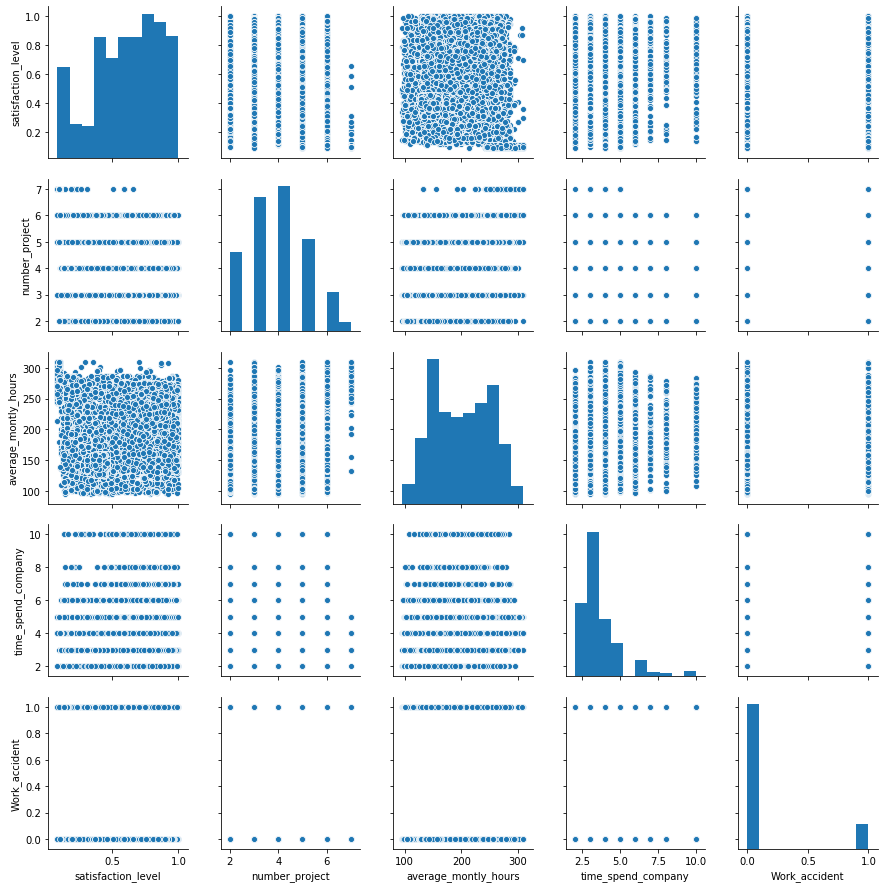

In [20]:
sns.pairplot(data[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident']])

По данным графикам видно, что  на 7 проекте люди не особо удовлетворены работой, на него также в среднем тратят больше часов по показателю "среднемесячные рабочее время", люди, работающие на нем в среднем работают меньше в компании.

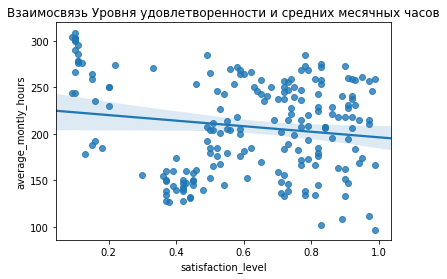

In [26]:
plt.title('Взаимосвязь Уровня удовлетворенности и средних месячных часов')
sns.regplot(x= 'satisfaction_level', y='average_montly_hours',data=data.sample(200), fit_reg=True)


В данном случае видно, что есть часть людей, которые при большой загрузке неудовлетворены своей работой,часть сотрудников, при низкой загрузке также имеющих низкую удовлетворенность,  в остальном же люди, работающие среднее кол-во часов имеют большую удовлетворенность своей работой.

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [27]:
stats.ttest_ind(data['average_montly_hours'], data['satisfaction_level'])

Ttest_indResult(statistic=491.5064991295991, pvalue=0.0)

In [28]:
stats.ttest_ind(data['last_evaluation'], data['satisfaction_level'])

Ttest_indResult(statistic=41.89868154070206, pvalue=0.0)

In [30]:
stats.ttest_ind(data[data['salary'] == 'high']['satisfaction_level'], data[data['salary'] == 'low']['satisfaction_level'])

Ttest_indResult(statistic=4.76273109535092, pvalue=1.9413281282548522e-06)

В данном случае мы искали взаимосвязи между переменными и pvalue < 0.05 наглядно демонстрирует нам, что есть кореляция между среднемесячными рабочими часами и удовлетворенностью, а аткже между последней оценкой и удовлетворенностью. При оценке кореляции между уровнем зарплаты и удволетворенностью сотруднкиами могла возникнуть ошибка, но данные pvalue слишком малы. Ошибка маловероятна.

# 6.Рассчитать сколько работников работает в каждом департаменте.

Ниже код, иллюстрирующий, сколько работником в каждом депратамента. Для этого мы сгруппировали датасет по отделу, затем посчитали кол-во элементов, переопределили индекс и переименовали столбцы.

In [43]:
employees_by_dep = data.groupby('sales')['salary'].count().to_frame().reset_index()
employees_by_dep.columns = ['Department','Number_of_Employees']
employees_by_dep

Department  Number_of_Employees
0           IT                 1227
1        RandD                  787
2   accounting                  767
3           hr                  739
4   management                  630
5    marketing                  858
6  product_mng                  902
7        sales                 4140
8      support                 2229
9    technical                 2720

# 7.Показать распределение сотрудников по зарплатам.

Для начала посчитаем кол-во сотрудников с каждой оценкой зарплаты. Воспользовались тем же методом, что и в предыдущем задании.

In [45]:
employees_by_salary = data.groupby('salary')['sales'].count().to_frame().reset_index()
employees_by_salary.columns = ['Salary','Number_of_Employees']
employees_by_salary

Salary  Number_of_Employees
0    high                 1237
1     low                 7316
2  medium                 6446

Затем составили график, иллюстрирующий распределение сотрудников по зарплатам. Видим, что больше всего низкооплачиваемых сотрудников, меньше всего - высокооплачиваемых.

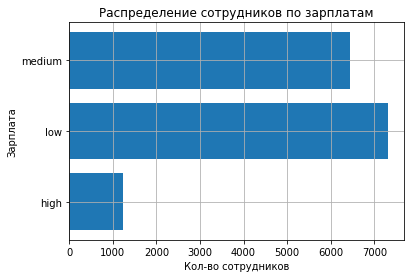

In [52]:
plt.barh(employees_by_salary['Salary'], employees_by_salary['Number_of_Employees'])
plt.xlabel('Кол-во сотрудников')
plt.ylabel('Зарплата')
plt.title('Распределение сотрудников по зарплатам')
plt.grid()


# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [109]:
dep_salary_data = data.groupby(['salary', 'sales']).count().reset_index()
dep_salary_data.head(10)

salary        sales  satisfaction_level  last_evaluation  number_project  \
0   high           IT                  83               83              83   
1   high        RandD                  51               51              51   
2   high   accounting                  74               74              74   
3   high           hr                  45               45              45   
4   high   management                 225              225             225   
5   high    marketing                  80               80              80   
6   high  product_mng                  68               68              68   
7   high        sales                 269              269             269   
8   high      support                 141              141             141   
9   high    technical                 201              201             201   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                    83                  83             83    83   
1                    51                  51             51    51   
2                    74                  74             74    74   
3                    45                  45             45    45   
4                   225                 225            225   225   
5                    80                  80             80    80   
6                    68                  68             68    68   
7                   269                 269            269   269   
8                   141                 141            141   141   
9                   201                 201            201   201   

   promotion_last_5years  
0                     83  
1                     51  
2                     74  
3                     45  
4                    225  
5                     80  
6                     68  
7                    269  
8                    141  
9                    201

Для этого мы сгруппировали данные  в датасете по зарплатам, посчитали и переопределили индекс.Далее строим график. Т.к. значения кол-ва в любом столбце после подсчета одинаково, строим график по отделу и любому параметру. Видим, что сотрудников с высокой зарплатой больше всего в продажах и менеджемнте, а с наименьшей  -  в продажах, техническом отделе и поддержке. При этом наименьший разброс между значениями наблюдается в менеджменте,  а наибольший -  в продажах.

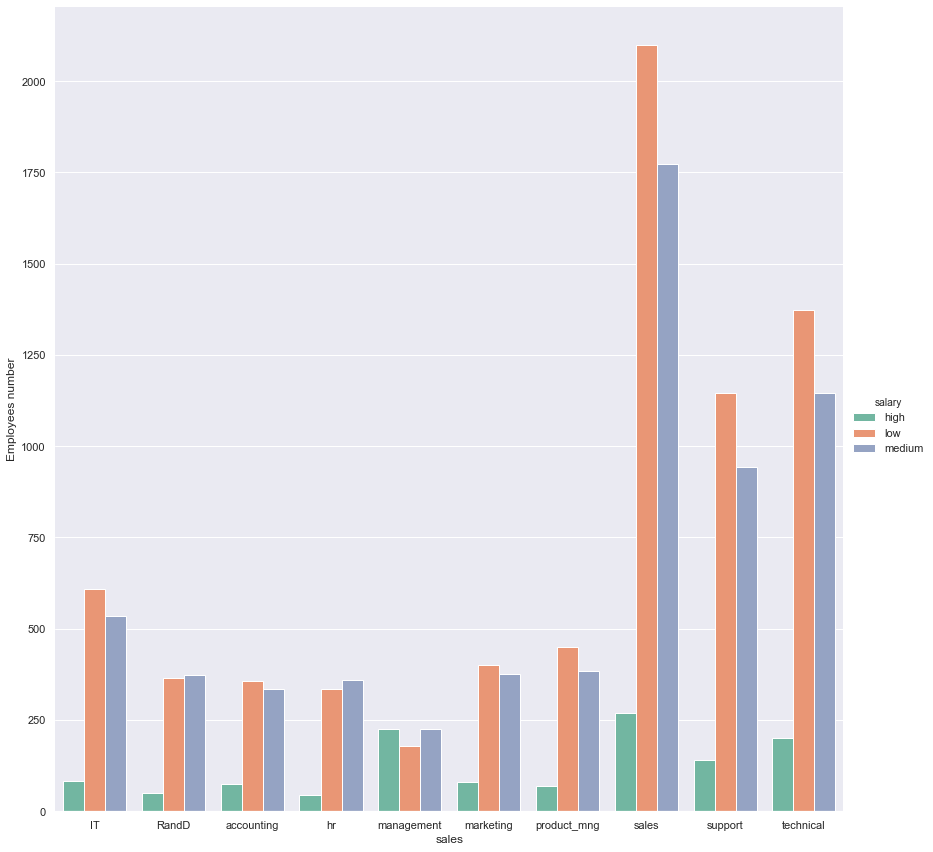

In [68]:
sns.set(style="darkgrid")
output = sns.catplot(x="sales", 
                     y = "satisfaction_level", 
                     hue="salary", 
                     data=dep_salary_data,
                     height=12, 
                     kind="bar", 
                     palette="Set2")
output.despine(left=True)
output.set_ylabels("Employees number")

# 9.Сколько сотрудников покинули компанию.

In [72]:
print('Компанию покинули:', data['left'].sum())

Компанию покинули: 3571


Просуммировали кол-во сотрудников, покинувших компанию.

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [92]:
data.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

Очевидно, что наибольшие колебания в значениях для оставшихся сотрудников и уволившихся по атким параметрам как уровень удовлетворенности, среднее кол-во часов в месяц, инциденты на работе и продвижения за последние 5 лет.

Гипотеза о том, что увольнения зависят от уровня удовлетворенности подтверждается.

In [94]:
stats.ttest_ind(data[data['left']==1]['satisfaction_level'], data[data['left']==0]['satisfaction_level'])


Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

Кол-во часов в месяц также влияет на увольнения, но в значительно меньшей степени, скорее незначительно, т.к. pvalue < 0.05, что означает, что ошибка безусловно маловероятна.

In [96]:
print(stats.ttest_ind(data[data['left']==1]['average_montly_hours'], data[data['left']==0]['average_montly_hours']))

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)


Гипотеза о влиянии инцидентов на рабочем месте не подтверждается, т.к. при достаточно низкой вероятности ошибки среднее значения наглядно показывает, что среднее кол-во инцидентов на рабочем месте больше у работающих, чем у уволившихся сотрудников.

In [99]:
print(stats.ttest_ind(data[data['left']==1]['Work_accident'], data[data['left']==0]['Work_accident']))

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)


У уволившихся сотрудников меньше продвижений за последние 5 лет - данная гипотеза имеет право на жизнь. Ошибка также маловероятна, а значения отличаются почти в 7 раз!

In [102]:
print(stats.ttest_ind(data[data['left']==1]['promotion_last_5years'], data[data['left']==0]['promotion_last_5years']))

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)


Т.о. основной причиной ухода из компании по данным можно считать низкий уровень удовлетворенности, менее значимыми - отсутствие продвижений и среднее кол-во часов в месяц.

Также исходя из Задания 4 можно сделать вывод, что наибольшую проблему представляет 7 проект, люди на котором более загружены и менее удовлетворены работой, что ведел к меньшей продолжительности работы на компания и как итог - портит статистику по увольнениям.